In [2]:
import numpy as np
np.random.seed(123456789)
import math as ma
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

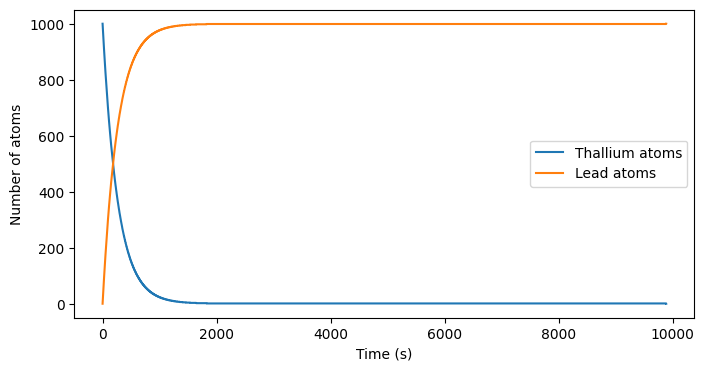

In [3]:
# computation with 1 second steps
# initial sample
Tl_in=1000
Pb_in=0

# Probability
def p(t):
    # half-life
    tau = 3.052*60
    return 1-2**(-t/tau)

Tl=[Tl_in]
Pb=[Pb_in]
i=0
while Tl[i] != 0:
    i += 1
    Tl.append(Tl_in - int(p(i)*1000))
    Pb.append(int(p(i)*1000))

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(np.arange(len(Tl)), Tl, label = 'Thallium atoms')
ax.plot(np.arange(len(Pb)), Pb, label = 'Lead atoms')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms');

In [4]:
# computation with inverse trasform method
# Probability
def p(t):
    #half-life
    tau = 3.052*60
    return 2**(t/tau)*ma.log(2)/tau

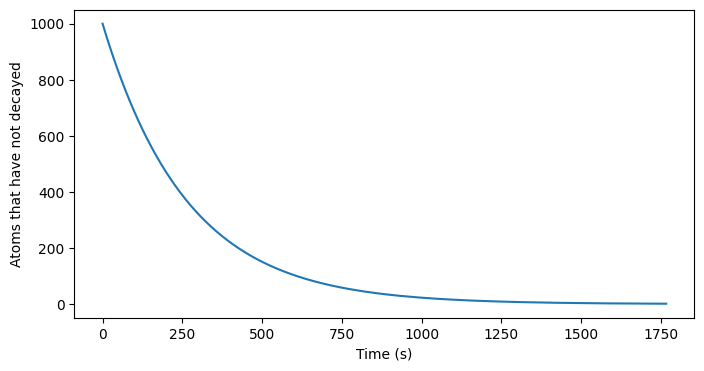

In [5]:
#uniform distribution
z=np.sort(np.random.uniform(0,1,1000))

def t(z):
    #half-life
    tau = 3.052*60
    return -tau*np.log2(1-z)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(t(z),1000-z*1000)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Atoms that have not decayed');

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function:

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [6]:
def f(x):
    return (ma.sin(1/(1-x)))**2

Integral obtained with hit/miss method 1.34


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


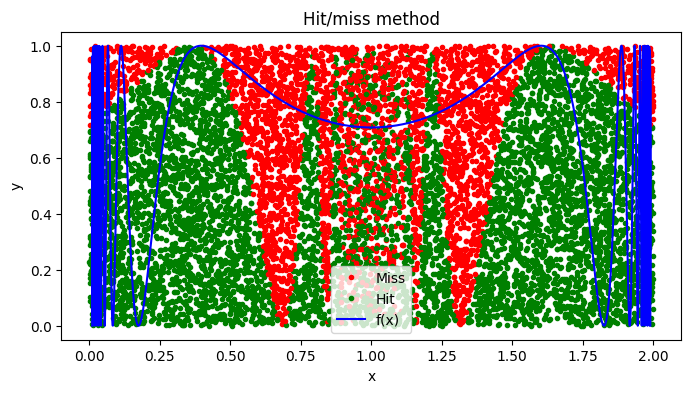

In [7]:
N=10000

fig, ax = plt.subplots(figsize=(8,4))


count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x):
        count+=1
        hit, = ax.plot(x,y, 'g.')
    else:
        miss, = ax.plot(x,y, 'r.')

hit.set_label('Hit')
miss.set_label('Miss')
x=np.linspace(0.01,1.99,N)
ax.plot(x, (np.sin(1/(x*(2-x))))**2, 'b-', label='f(x)')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Hit/miss method')

I_hm=2*count/N
print('Integral obtained with hit/miss method',I_hm)

In [8]:
M=15

Ii=np.zeros(M)

for j in range(M):
    count=0
    for i in range(N):
        x=2*np.random.random()
        y=np.random.random()
        if y<f(x):
            count+=1
    Ii[j]=2*count/N

std_hm= ma.sqrt((np.sum(Ii-I_hm))**2/(M-1))

print('Error on hit/miss method',std_hm)

Error on hit/miss method 0.040035734038480916


In [9]:
N=10000
a=0.001
b=1.999
x=np.random.uniform(a,b,N)
sumf=0
for i in range(N):
    sumf += f(x[i])
I_mv=(b-a)/N * sumf
print('Integral obtained with mean value method',I_mv)

Integral obtained with mean value method 1.3380230671464564


In [10]:
#<f>
f_m = I_mv/2

#<f^2>
sumf=0
for i in range(N):
    fi=f(x[i])
    sumf += fi**2

f2_m=sumf / N

var=f2_m-f_m**2

std_mv = 2*ma.sqrt(var)/ma.sqrt(N)

print('Error mean value method', std_mv)

Error mean value method 0.006620437084712789


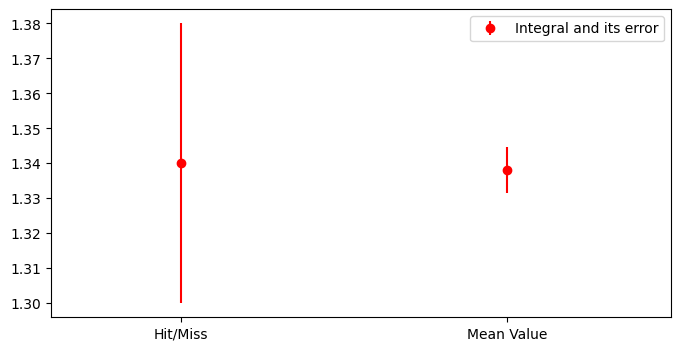

In [11]:
fig, ax = plt.subplots(figsize=(8,4))

x=[0,0.5]
y=[I_hm, I_mv]
std=[std_hm, std_mv]
ax.errorbar(x,y,std, fmt='ro',ecolor='r', label='Integral and its error')
ax.legend()
ax.set_xlim(-0.2, 0.75)
plt.xticks(x, ('Hit/Miss', 'Mean Value'));

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array}
\right.
$$

* Generalize the result for a 10D sphere.

In [12]:
def f(x,y):
    if x**2+y**2 <=1: return 1
    else: return 0

Integral obtained with hit/miss method 3.1456


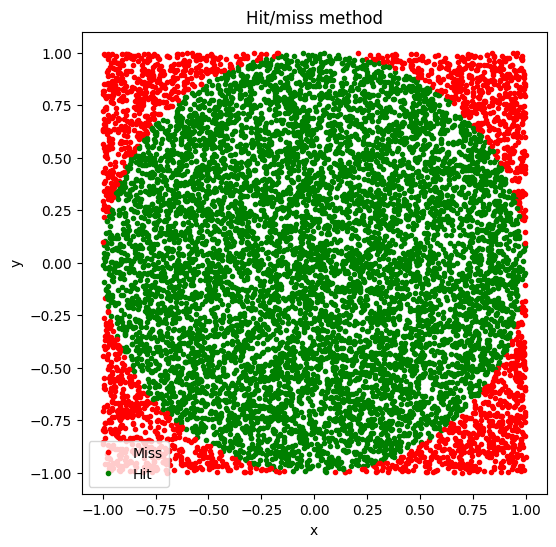

In [13]:
# hit/miss
N=10000

fig, ax = plt.subplots(figsize=(6,6))

count=0
for i in range(N):
    a=np.random.random()
    b=np.random.random()
    if a >0.5: signx=1
    else: signx=-1
    if b >0.5: signy=1
    else: signy=-1
    x=signx*np.random.random()
    y=signy*np.random.random()
    z=np.random.random()
    if z<f(x,y):
        count += 1
        hit, = ax.plot(x,y, 'g.')
    else:
        miss, = ax.plot(x,y, 'r.')


hit.set_label('Hit')
miss.set_label('Miss')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Hit/miss method')

I=4*count/N
print('Integral obtained with hit/miss method',I)

In [14]:
# mean method
N=10000
a=-1
b=1
x=np.random.uniform(a,b,N)
y=np.random.uniform(a,b,N)
sumf=0
for i in range(N):
    sumf += f(x[i],y[i])

I=(b-a)*(b-a)/N * sumf
print('Integral obtained with mean value method',I)

Integral obtained with mean value method 3.1508000000000003


In [15]:
def f(x):
    s=0
    for i in range(10):
        s += (x[i])**2
    if s <=1: return 1
    else: return 0

In [16]:
# hit/miss
N=100000

count=0

for i in range(0,N):
    sign=[]
    x=[]
    for j in range(0,10):
        a=np.random.random()
        if a > 0.5: sign.append(1)
        else: sign.append(-1)
    for j in range(0,10):
        x.append(sign[j]*np.random.random())

    z=np.random.random()
    if z<f(x):
        count += 1

A=2**10

I=A*count/N
print('Integral obtained with hit/miss method',I)

Integral obtained with hit/miss method 2.43712


In [17]:
#mean method
N=100000
a=-1
b=1

x=np.zeros((10,N))
for i in range(10):
    x[i]=np.random.uniform(a,b,N)

sumf=0
for i in range(N):
    sumf += f(x[:,i])

I=(b-a)**10/N * sumf
print('Integral obtained with mean value method',I)

Integral obtained with mean value method 2.59072


4\. **Monte Carlo integration with importance sampling**

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

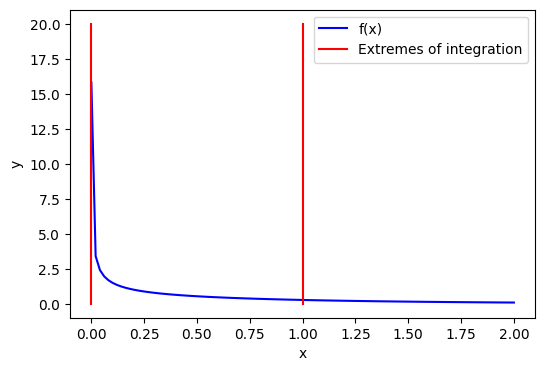

In [18]:
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

fig, ax = plt.subplots(figsize=(6,4))
x=np.linspace(0.001,2,100)
y=np.linspace(0,20,100)

ax.plot(x,f(x),'b',label='f(x)')
ax.plot(np.zeros(100),y,'r', label='Extremes of integration')
ax.plot(np.ones(100),y,'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();

In [19]:
N = 1000000

def f_div_w(x):
    return 1/(np.exp(x)+1)

#inverse trasform to draw N points distributed as w
def icdf(z):
    return np.power(z,2)

#uniform distribution
z=np.random.uniform(0,1,N)

x=icdf(z)

s=np.sum(f_div_w(x))
I=(2/N) * s

print('The integral is:',I)

The integral is: 0.8390777798912304
